**Fit Results for First-Order Kinetics**

,Method,C0,k
0,Linear Fit,99.680971,0.204743
1,Nonlinear Fit,99.801433,0.205502


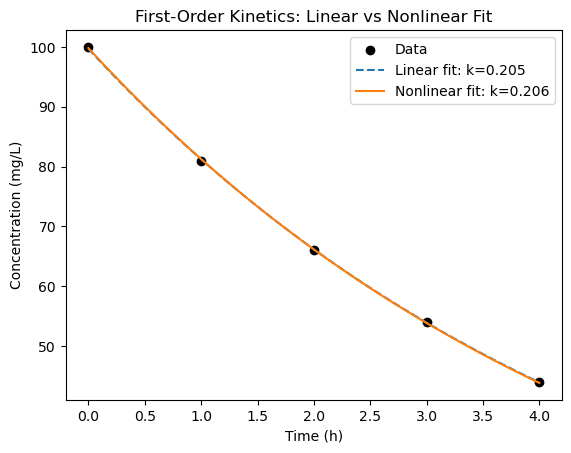

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

# Example dataset: first-order decay
t = np.array([0, 1, 2, 3, 4], dtype=float)
C = np.array([100, 81, 66, 54, 44], dtype=float)

# ---------- Linear Fit (log-transform) ----------
lnC = np.log(C)
slope, intercept, r_value, p_value, std_err = linregress(t, lnC)

k_linear = -slope
C0_linear = np.exp(intercept)

# ---------- Nonlinear Fit (direct exponential) ----------
def first_order_model(t, C0, k):
    return C0 * np.exp(-k*t)

popt, pcov = curve_fit(first_order_model, t, C, p0=(100, 0.2))
C0_nonlinear, k_nonlinear = popt

# Predictions
t_fit = np.linspace(0, 4, 100)
C_fit_linear = C0_linear * np.exp(-k_linear * t_fit)
C_fit_nonlinear = C0_nonlinear * np.exp(-k_nonlinear * t_fit)

# Store results in dataframe for display
results = pd.DataFrame({
    "Method": ["Linear Fit", "Nonlinear Fit"],
    "C0": [C0_linear, C0_nonlinear],
    "k": [k_linear, k_nonlinear]
})

# Try to use company-specific display helper, otherwise fallback to IPython.display
# NOTE: Some environments (e.g., external collaborators or CI) may not have
# the internal `caas_jupyter_tools` package available. We catch ImportError
# and use IPython.display as a portable fallback so the notebook runs anywhere.
try:
    import caas_jupyter_tools
    caas_jupyter_tools.display_dataframe_to_user("Fit Results for First-Order Kinetics", results)
except Exception as e:
    # Fallback: show a clear heading and display the dataframe using IPython.display
    from IPython.display import display, Markdown
    display(Markdown("**Fit Results for First-Order Kinetics**"))
    display(results)

# Plot
plt.scatter(t, C, label="Data", color="black")
plt.plot(t_fit, C_fit_linear, label=f"Linear fit: k={k_linear:.3f}", linestyle="--")
plt.plot(t_fit, C_fit_nonlinear, label=f"Nonlinear fit: k={k_nonlinear:.3f}", linestyle="-")
plt.xlabel("Time (h)")
plt.ylabel("Concentration (mg/L)")
plt.legend()
plt.title("First-Order Kinetics: Linear vs Nonlinear Fit")
plt.show()
